In [1]:
# San Francisco Passenger Analyzing and Clustering

In [260]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score

In [216]:
pd.set_option('display.max_columns', None)

In [217]:
df = pd.read_csv('air-traffic-passenger-statistics.csv')

In [218]:
df2 = pd.read_csv('air-traffic-passenger-statistics.csv')

In [219]:
df2.iloc[6168]

Activity Period                                          200911
Operating Airline              United Airlines - Pre 07/01/2013
Operating Airline IATA Code                                  UA
Published Airline              United Airlines - Pre 07/01/2013
Published Airline IATA Code                                  UA
GEO Summary                                       International
GEO Region                                                 Asia
Activity Type Code                               Thru / Transit
Price Category Code                                       Other
Terminal                                          International
Boarding Area                                                 G
Passenger Count                                            1703
Name: 6168, dtype: object

In [220]:
df 

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090
...,...,...,...,...,...,...,...,...,...,...,...,...
18880,201806,WOW Air,WW,WOW Air,WW,International,Europe,Enplaned,Other,International,G,50
18881,201806,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Deplaned,Other,International,A,10868
18882,201806,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Enplaned,Other,International,A,11664
18883,201806,XL Airways France,SE,XL Airways France,SE,International,Europe,Deplaned,Other,International,A,804


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline            18885 non-null  object
 2   Operating Airline IATA Code  18822 non-null  object
 3   Published Airline            18885 non-null  object
 4   Published Airline IATA Code  18822 non-null  object
 5   GEO Summary                  18885 non-null  object
 6   GEO Region                   18885 non-null  object
 7   Activity Type Code           18885 non-null  object
 8   Price Category Code          18885 non-null  object
 9   Terminal                     18885 non-null  object
 10  Boarding Area                18885 non-null  object
 11  Passenger Count              18885 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ MB


In [222]:
df.describe()

,Activity Period,Passenger Count
count,18885.000000,18885.000000
mean,201179.285994,29876.744400
std,385.755460,60626.072969
min,200507.000000,1.000000
25%,200811.000000,5352.000000
50%,201204.000000,9170.000000
75%,201509.000000,20718.000000
max,201806.000000,659837.000000


In [223]:
df.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    63
Published Airline               0
Published Airline IATA Code    63
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
dtype: int64

In [224]:
df['Published Airline IATA Code'][148]

nan

In [225]:
df[df['Published Airline IATA Code'] == nan]

NameError: name 'nan' is not defined

In [226]:
df[df['Published Airline'] == 'Servisair']

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
6809,201005,Servisair,NaN,Servisair,NaN,Domestic,US,Deplaned,Low Fare,International,G,73
6810,201005,Servisair,NaN,Servisair,NaN,Domestic,US,Enplaned,Low Fare,International,G,73
7168,201008,Servisair,NaN,Servisair,NaN,Domestic,US,Deplaned,Low Fare,International,G,118
7169,201008,Servisair,NaN,Servisair,NaN,Domestic,US,Enplaned,Low Fare,International,G,118
7742,201101,Servisair,NaN,Servisair,NaN,Domestic,US,Deplaned,Low Fare,International,A,40
7743,201101,Servisair,NaN,Servisair,NaN,Domestic,US,Enplaned,Low Fare,International,A,40
7967,201103,Servisair,NaN,Servisair,NaN,Domestic,US,Deplaned,Low Fare,International,A,64
7968,201103,Servisair,NaN,Servisair,NaN,Domestic,US,Enplaned,Low Fare,International,A,64
8323,201106,Servisair,NaN,Servisair,NaN,Domestic,US,Deplaned,Low Fare,International,A,237
8324,201106,Servisair,NaN,Servisair,NaN,Domestic,US,Enplaned,Low Fare,International,A,262


In [227]:
df.loc[(df['Published Airline IATA Code'].isnull())]['Published Airline'].value_counts()

Servisair               36
Swissport USA           22
Pacific Aviation         2
Trego Dugan Aviation     2
Boeing Company           1
Name: Published Airline, dtype: int64

In [228]:
#Servisair - SA
#Swissport USA -SU
#Trego Dugan Aviation - TDA
#Pacific Aviation - PA
#Boeing Company -BC

df.loc[(df['Published Airline']=='Servisair'),['Published Airline IATA Code','Operating Airline IATA Code']]= 'SA'
df.loc[(df['Published Airline']=='Swissport USA'),['Published Airline IATA Code','Operating Airline IATA Code']]= 'SU'
df.loc[(df['Published Airline']=='Trego Dugan Aviation'),['Published Airline IATA Code','Operating Airline IATA Code']]= 'TDA'
df.loc[(df['Published Airline']=='Pacific Aviation'),['Published Airline IATA Code','Operating Airline IATA Code']]= 'PA'
df.loc[(df['Published Airline']=='Boeing Company'),['Published Airline IATA Code','Operating Airline IATA Code']]= 'BC'

#boş olan kodları havayolu markasının baş harfleriyle doldurduk

In [229]:
df.isnull().sum()

Activity Period                0
Operating Airline              0
Operating Airline IATA Code    0
Published Airline              0
Published Airline IATA Code    0
GEO Summary                    0
GEO Region                     0
Activity Type Code             0
Price Category Code            0
Terminal                       0
Boarding Area                  0
Passenger Count                0
dtype: int64

In [230]:
df[df.duplicated()]

#duplike veri yok

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count


In [231]:

df['Published Airline IATA Code'].value_counts()

UA     4649
AS     1203
DL      975
AA      588
AC      484
       ... 
5Y        2
PA        2
TDA       2
XP        2
BC        1
Name: Published Airline IATA Code, Length: 78, dtype: int64

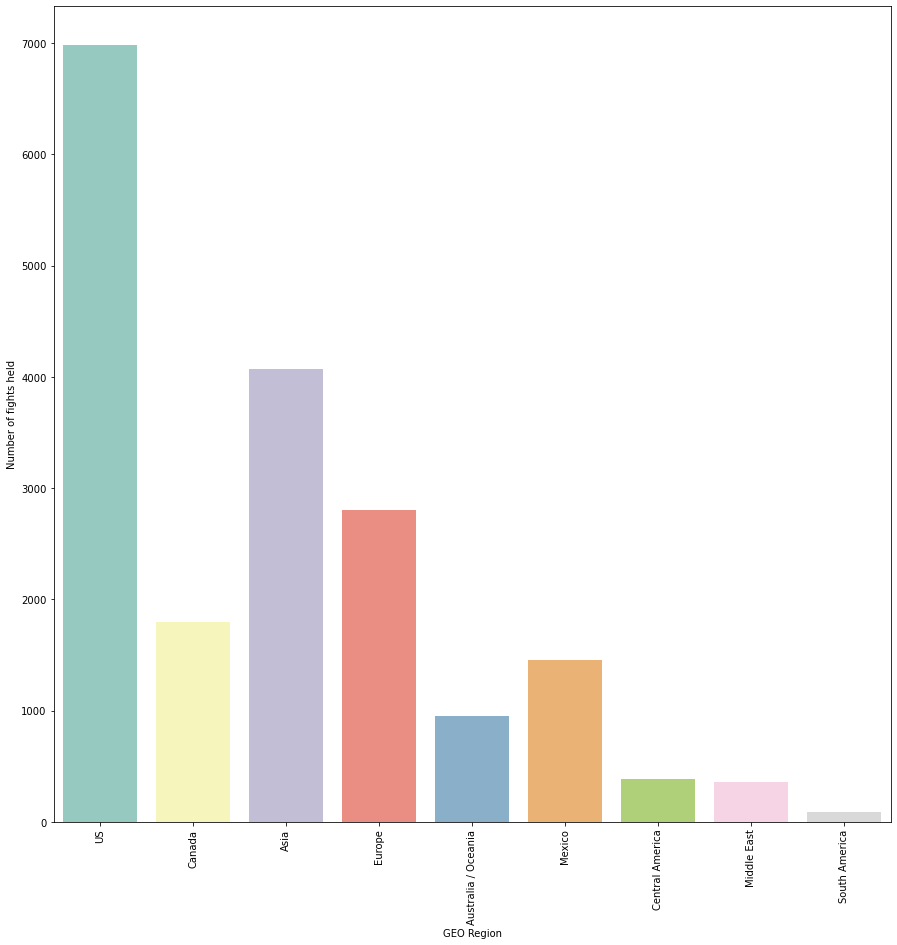

In [232]:
plt.figure(figsize = (15,15))
sns.countplot(x = "GEO Region", palette = "Set3",data = df)
plt.xticks(rotation = 90)
plt.ylabel("Number of fights held")
plt.show()

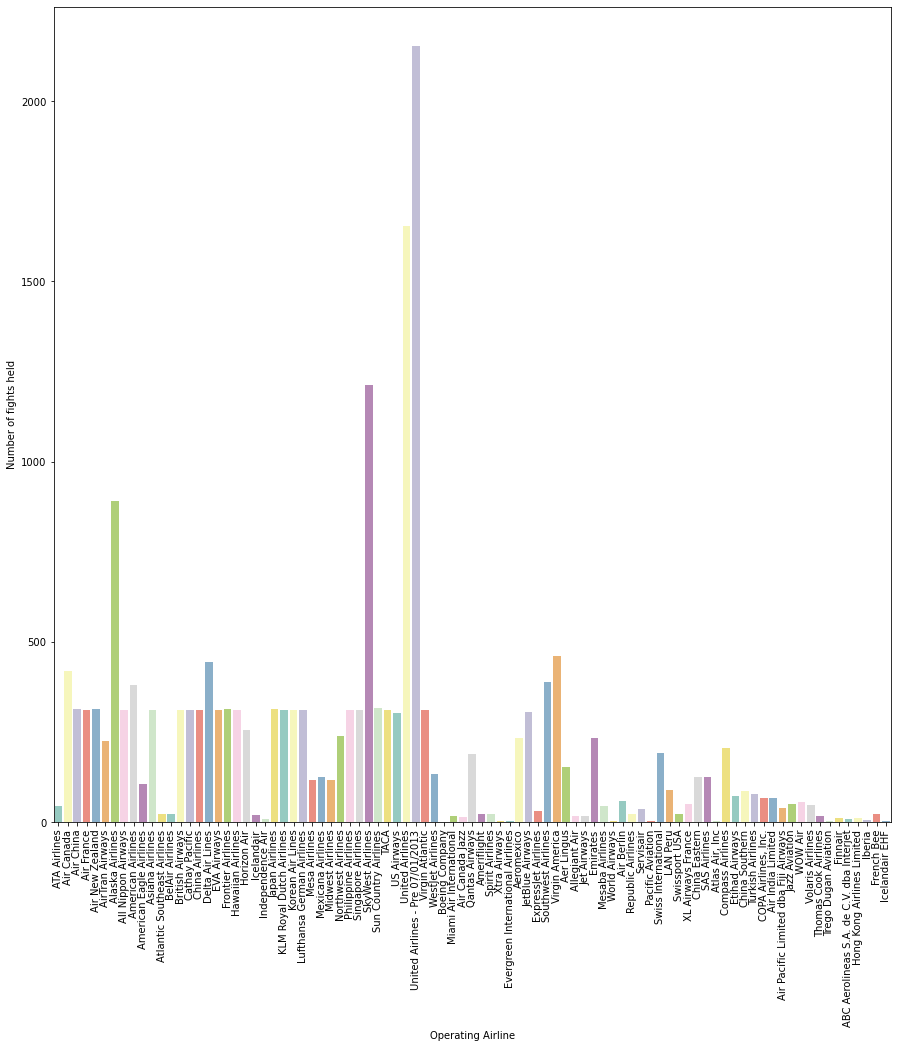

In [233]:
plt.figure(figsize = (15,15))
sns.countplot(x = "Operating Airline", palette = "Set3",data = df)
plt.xticks(rotation = 90)
plt.ylabel("Number of fights held")
plt.show()

In [234]:
df.sample()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
489,200511,Alaska Airlines,AS,Alaska Airlines,AS,International,Canada,Enplaned,Other,International,A,5889


In [235]:
label_encoder = LabelEncoder()
#df['Operating Airline'] = label_encoder.fit_transform(df['Operating Airline'])
#df['Operating Airline IATA Code'] = label_encoder.fit_transform(df['Operating Airline IATA Code'])
#df['Published Airline'] = label_encoder.fit_transform(df['Published Airline'])
#df['Published Airline IATA Code'] = label_encoder.fit_transform(df['Published Airline IATA Code'])
#df['GEO Summary'] = label_encoder.fit_transform(df['GEO Summary'])
#df['GEO Region'] = label_encoder.fit_transform(df['GEO Region'])
#df['Activity Type Code'] = label_encoder.fit_transform(df['Activity Type Code'])
#df['Price Category Code'] = label_encoder.fit_transform(df['Price Category Code'])
#df['Terminal'] = label_encoder.fit_transform(df['Terminal'])
#df['Boarding Area'] = label_encoder.fit_transform(df['Boarding Area'])

print(df['Operating Airline'])



0             ATA Airlines
1             ATA Airlines
2             ATA Airlines
3               Air Canada
4               Air Canada
               ...        
18880              WOW Air
18881     WestJet Airlines
18882     WestJet Airlines
18883    XL Airways France
18884    XL Airways France
Name: Operating Airline, Length: 18885, dtype: object


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline            18885 non-null  object
 2   Operating Airline IATA Code  18885 non-null  object
 3   Published Airline            18885 non-null  object
 4   Published Airline IATA Code  18885 non-null  object
 5   GEO Summary                  18885 non-null  object
 6   GEO Region                   18885 non-null  object
 7   Activity Type Code           18885 non-null  object
 8   Price Category Code          18885 non-null  object
 9   Terminal                     18885 non-null  object
 10  Boarding Area                18885 non-null  object
 11  Passenger Count              18885 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ MB


In [237]:
df.sample(10)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
4340,200808,American Airlines,AA,American Airlines,AA,Domestic,US,Enplaned,Other,Terminal 3,E,151547
12138,201403,United Airlines,UA,United Airlines,UA,International,Canada,Deplaned,Other,Terminal 3,F,11786
18612,201805,French Bee,BF,French Bee,BF,International,Australia / Oceania,Deplaned,Other,International,G,361
10576,201302,Alaska Airlines,AS,Alaska Airlines,AS,International,Mexico,Enplaned,Other,Terminal 1,B,4878
8894,201111,JetBlue Airways,B6,JetBlue Airways,B6,Domestic,US,Deplaned,Low Fare,International,A,37223
9646,201206,Air China,CA,Air China,CA,International,Asia,Deplaned,Other,International,G,7211
6359,201001,Northwest Airlines,NW,Northwest Airlines,NW,Domestic,US,Thru / Transit,Other,Terminal 1,C,2037
12724,201409,Air France,AF,Air France,AF,International,Europe,Enplaned,Other,International,A,15447
13237,201501,Philippine Airlines,PR,Philippine Airlines,PR,International,Asia,Deplaned,Other,International,A,11711
1654,200609,Korean Air Lines,KE,Korean Air Lines,KE,International,Asia,Deplaned,Other,International,A,4532


In [238]:
columns = ['Operating Airline','GEO Summary','GEO Region','Activity Type Code','Price Category Code','Passenger Count']

In [239]:
X= df[columns]

In [240]:
X.columns

Index(['Operating Airline', 'GEO Summary', 'GEO Region', 'Activity Type Code',
       'Price Category Code', 'Passenger Count'],
      dtype='object')

ValueError: could not convert string to float: 'ATA Airlines'

/Users/tuba.saday/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


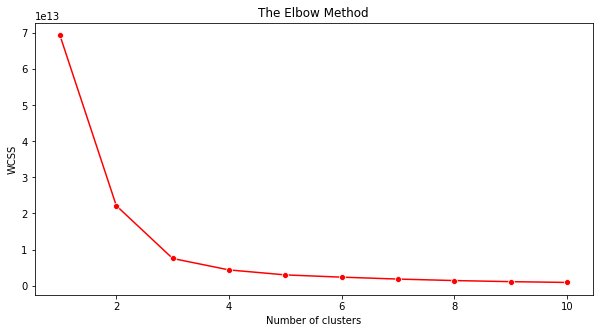

In [27]:
#3 OLMALI CLUSTER

In [242]:
OpAir = X['Operating Airline'].value_counts()
OpAir.sort_index(inplace=True)


In [243]:
OpAir

ABC Aerolineas S.A. de C.V. dba Interjet      8
ATA Airlines                                 44
Aer Lingus                                  152
Aeromexico                                  234
Air Berlin                                   60
                                           ... 
WOW Air                                      56
WestJet Airlines                            135
World Airways                                 3
XL Airways France                            51
Xtra Airways                                  2
Name: Operating Airline, Length: 89, dtype: int64

In [244]:
passenger_count = df.groupby("Operating Airline").sum()["Passenger Count"]
passenger_count.sort_index(inplace=True)


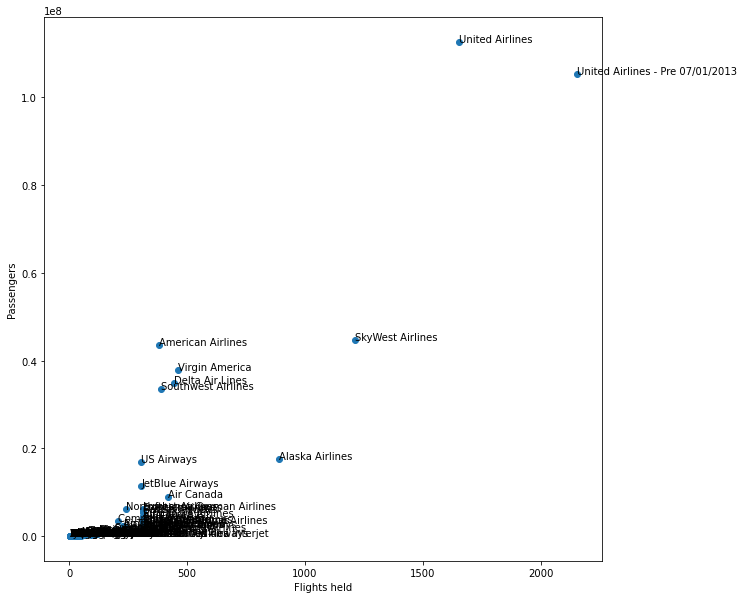

In [245]:
x = OpAir.values
y = passenger_count.values
plt.figure(figsize = (10,10))
plt.scatter(x, y)
plt.xlabel("Flights held")
plt.ylabel("Passengers")
for i, txt in enumerate(OpAir.index.values):
    a = plt.gca()
    plt.annotate(txt, (x[i], y[i]))
plt.show()


In [246]:
df_1 = OpAir + passenger_count
df_1.sort_values(ascending = False, inplace = True)
df_1

United Airlines                     112642061
United Airlines - Pre 07/01/2013    105366071
SkyWest Airlines                     44583568
American Airlines                    43622767
Virgin America                       37844382
                                      ...    
Xtra Airways                              148
Ameriflight                               132
Atlas Air, Inc                             70
Boeing Company                             19
Evergreen International Airlines            6
Length: 89, dtype: int64

In [247]:
outliers = df_1.head(2).index.values
outliers

array(['United Airlines', 'United Airlines - Pre 07/01/2013'],
      dtype=object)

In [248]:
passenger_count

Operating Airline
ABC Aerolineas S.A. de C.V. dba Interjet      15585
ATA Airlines                                 384764
Aer Lingus                                   777691
Aeromexico                                  1672946
Air Berlin                                   235155
                                             ...   
WOW Air                                      295168
WestJet Airlines                             799801
World Airways                                   785
XL Airways France                            118961
Xtra Airways                                    146
Name: Passenger Count, Length: 89, dtype: int64

In [249]:
OpAir = OpAir.drop(outliers)
OpAir.sort_index(inplace=True)
passenger_count = passenger_count.drop(outliers)
passenger_count.sort_index(inplace = True)
x = OpAir.values
y = passenger_count.values

In [250]:
X = np.array(list(zip(x,y)))

/Users/tuba.saday/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


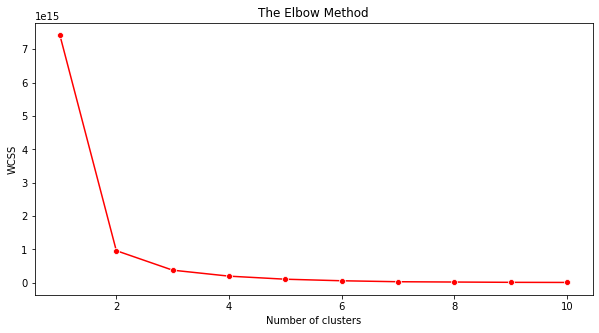

In [253]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [256]:
kmeans = KMeans(n_clusters = 6,random_state = 42)
k_fit = kmeans.fit(X)
y_kmeans = kmeans.predict(X)

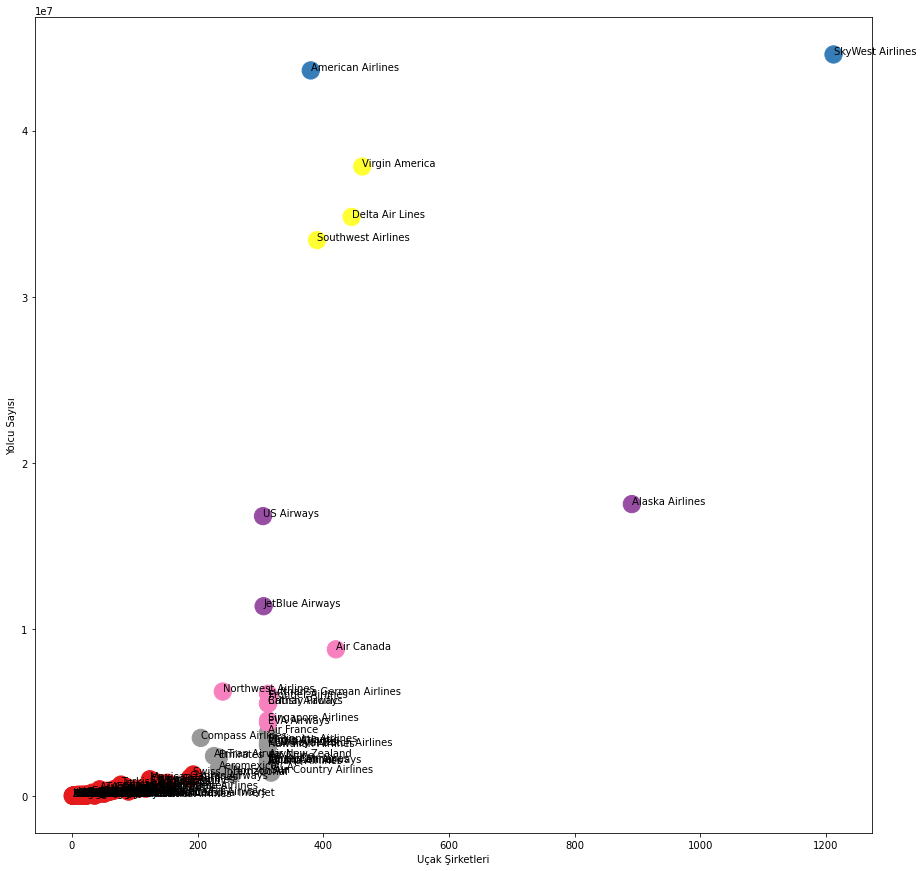

In [270]:
plt.figure(figsize = (15,15))
plt.xlabel("Uçak Şirketleri")
plt.ylabel("Yolcu Sayısı")
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=300, cmap='Set1')
for i, txt in enumerate(OpAir.index.values):
    plt.annotate(txt, (X[i,0], X[i,1]), size = 10)
plt.show()

In [271]:
kumeler = k_fit.labels_
kumeler

array([0, 0, 0, 5, 0, 4, 0, 5, 5, 0, 5, 0, 5, 2, 5, 0, 1, 0, 0, 5, 0, 0,
       0, 0, 4, 0, 4, 5, 0, 0, 5, 3, 4, 5, 0, 0, 0, 0, 0, 4, 5, 0, 5, 0,
       0, 0, 0, 5, 0, 0, 2, 5, 5, 0, 4, 0, 0, 0, 0, 0, 4, 0, 5, 0, 0, 0,
       0, 4, 1, 3, 0, 5, 0, 0, 5, 0, 0, 0, 2, 3, 5, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [273]:
merkezler = k_fit.cluster_centers_
merkezler

array([[4.76666667e+01, 2.25247980e+05],
       [7.96000000e+02, 4.41023715e+07],
       [5.00000000e+02, 1.52518633e+07],
       [4.32333333e+02, 3.53575743e+07],
       [3.16750000e+02, 5.89383762e+06],
       [2.86200000e+02, 2.37732945e+06]])

IndexError: index 2 is out of bounds for axis 1 with size 2

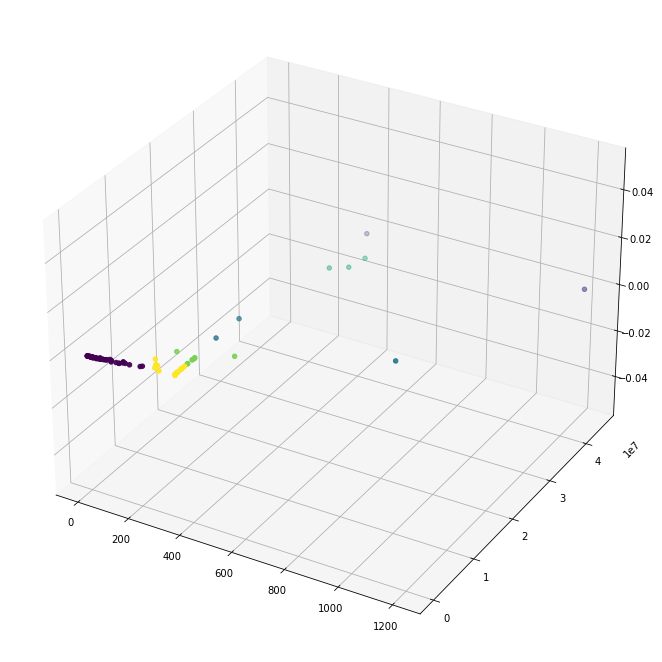

In [274]:
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize']=(16,9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1],c=kumeler)
ax.scatter(merkezler[:,0],merkezler[:,1],merkezler[:,2],marker='*',c='#050505',s=1000)

In [268]:
score = silhouette_score(X,y_kmeans)
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.720
